Laboratorio 2 - Deep Learning
Mariana David 201055


En parejas, utilicen el dataset publicado para definir una implementación de redes neuronales. Tienen libertad
de
• Elegir el objetivo de la red, puede ser clasificación (genero) o regresión (aprobación, ganancias).
• Elegir el subconjunto variables a utilizar.
Una vez elegido el objetivo y los campos a usar en la red construyan 3 redes diferentes donde,
• Se utilicen diferentes funciones de activación.
• Diferentes números de capas y neuronas.
• Diferentes técnicas de regularización.
Reporte.
1. Describa el objetivo de la red y por qué considera que la implementación de una red neuronal puede
obtener el resultado deseado.
2. Describa la composición y los resultados obtenidos por red neuronal.
3. Discuta la diferencia de rendimiento y conceptuales en la composición y resultados obtenidos en cada
red neural.
4. Seleccione la red neuronal optima y justifique su respuesta.
Pueden utilizar como base el archivo bn_implementation.ipynb publicado en la plataforma.

Importaciones


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


DataSet Seleccionado


In [8]:
dataset = "movie_statistic_dataset.csv" # Importacion del dataset 
df = pd.read_csv(dataset) # Carga del dataset
df # Muestra del dataset.
df.columns #Muestra de los títulos del dataset
df.head() #Mostrar data

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


***OBJETIVO:*** el objetivo es predecir la aprobación (approval_Index) de una película en función de las variables disponibles en el dataset.

In [2]:
# Cargar el dataset
data = pd.read_csv('movie_statistic_dataset.csv')  # Cambia esto al nombre de tu archivo

# Seleccionar las variables predictoras (características) y la variable de destino
features = ['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']
target = 'approval_Index'

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data[features].values
y = data[target].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el RMSE en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE en el conjunto de prueba: {rmse}')


Epoch 1/50
99/99 [==============================] - 2s 6ms/step - loss: 18.6144 - val_loss: 10.9701
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 7.0924 - val_loss: 4.4535
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 3.5398 - val_loss: 2.8337
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 2.4419 - val_loss: 1.9037
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 1.7894 - val_loss: 1.3165
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 1.3390 - val_loss: 0.9665
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 1.0115 - val_loss: 0.7439
Epoch 8/50
99/99 [==============================] - 0s 4ms/step - loss: 0.8405 - val_loss: 0.6203
Epoch 9/50
99/99 [==============================] - 0s 3ms/step - loss: 0.7626 - val_loss: 0.5402
Epoch 10/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6778 - val_loss: 0.4926
Epoch 11/50
99/99

***Red Neuronal 1 - ReLU y Dropout:***

In [4]:


# Cargar el dataset
data = pd.read_csv('movie_statistic_dataset.csv')  # Cambia esto al nombre de tu archivo

# Seleccionar las variables predictoras (características) y la variable de destino
features = ['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']
target = 'approval_Index'

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data[features].values
y = data[target].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de red neuronal
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model_relu.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_relu.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Realizar predicciones en el conjunto de prueba
y_pred_relu = model_relu.predict(X_test_scaled)

# Calcular el RMSE en el conjunto de prueba
rmse_relu = np.sqrt(mean_squared_error(y_test, y_pred_relu))
print(f'RMSE en el conjunto de prueba (ReLU): {rmse_relu}')


Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 17.7013 - val_loss: 10.6120
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 6.4147 - val_loss: 3.9026
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 2.9835 - val_loss: 2.4471
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 2.3553 - val_loss: 1.7732
Epoch 5/50
99/99 [==============================] - 0s 4ms/step - loss: 1.7082 - val_loss: 1.2860
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 1.2611 - val_loss: 0.9904
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 1.1074 - val_loss: 0.7929
Epoch 8/50
99/99 [==============================] - 0s 3ms/step - loss: 0.9271 - val_loss: 0.6216
Epoch 9/50
99/99 [==============================] - 0s 3ms/step - loss: 0.7558 - val_loss: 0.5554
Epoch 10/50
99/99 [==============================] - 0s 3ms/step - loss: 0.7147 - val_loss: 0.4996
Epoch 11/50
99/99

***Red Neuronal 2 - Tanh y L2 Regularization:***

In [7]:
# Construir el modelo de red neuronal
model_tanh = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# Compilar el modelo
model_tanh.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_tanh.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Realizar predicciones en el conjunto de prueba
y_pred_tanh = model_tanh.predict(X_test_scaled)

# Calcular el RMSE en el conjunto de prueba
rmse_tanh = np.sqrt(mean_squared_error(y_test, y_pred_tanh))
print(f'RMSE en el conjunto de prueba (Tanh): {rmse_tanh}')


Epoch 1/50
99/99 [==============================] - 2s 6ms/step - loss: 10.0341 - val_loss: 0.4193
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2939 - val_loss: 0.3321
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2644 - val_loss: 0.3146
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 0.2483 - val_loss: 0.2982
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2381 - val_loss: 0.2862
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 0.2276 - val_loss: 0.2841
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 0.2218 - val_loss: 0.2737
Epoch 8/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2123 - val_loss: 0.2621
Epoch 9/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2082 - val_loss: 0.2629
Epoch 10/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1999 - val_loss: 0.2671
Epoch 11/50
99/99 

***Red Neuronal 3 - Leaky ReLU y Batch Normalization:***

In [35]:
# Construir el modelo de red neuronal
model_leaky_relu = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model_leaky_relu.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model_leaky_relu.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Realizar predicciones en el conjunto de prueba
y_pred_leaky_relu = model_leaky_relu.predict(X_test_scaled)

# Calcular el RMSE en el conjunto de prueba
rmse_leaky_relu = np.sqrt(mean_squared_error(y_test, y_pred_leaky_relu))
print(f'RMSE en el conjunto de prueba (Leaky ReLU): {rmse_leaky_relu}')


Epoch 1/100
27/27 - 2s - loss: 24.3731 - val_loss: 23.8000 - 2s/epoch - 80ms/step
Epoch 2/100
27/27 - 0s - loss: 20.9406 - val_loss: 20.4478 - 165ms/epoch - 6ms/step
Epoch 3/100
27/27 - 0s - loss: 17.0085 - val_loss: 16.2387 - 160ms/epoch - 6ms/step
Epoch 4/100
27/27 - 0s - loss: 12.4685 - val_loss: 11.3148 - 176ms/epoch - 7ms/step
Epoch 5/100
27/27 - 0s - loss: 8.0329 - val_loss: 6.8112 - 163ms/epoch - 6ms/step
Epoch 6/100
27/27 - 0s - loss: 4.3710 - val_loss: 3.7299 - 147ms/epoch - 5ms/step
Epoch 7/100
27/27 - 0s - loss: 1.9634 - val_loss: 2.0033 - 164ms/epoch - 6ms/step
Epoch 8/100
27/27 - 0s - loss: 0.7592 - val_loss: 1.0052 - 148ms/epoch - 5ms/step
Epoch 9/100
27/27 - 0s - loss: 0.2923 - val_loss: 0.9478 - 143ms/epoch - 5ms/step
Epoch 10/100
27/27 - 0s - loss: 0.1716 - val_loss: 0.9321 - 171ms/epoch - 6ms/step
Epoch 11/100
27/27 - 0s - loss: 0.1496 - val_loss: 0.9496 - 179ms/epoch - 7ms/step
Epoch 12/100
27/27 - 0s - loss: 0.1300 - val_loss: 0.6500 - 155ms/epoch - 6ms/step
Epoch 1

***Graficos de las 3 redes neuronales***

***1RA RED NEURONAL***


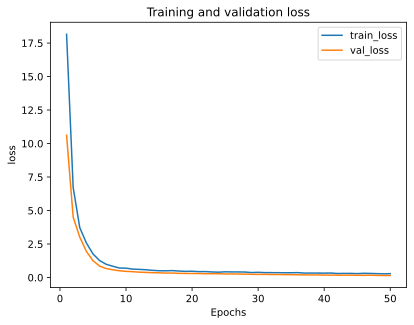

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

# Construir el modelo de red neuronal con activación 'ReLU'
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model_relu.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history_relu = model_relu.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Mostrar gráfico de entrenamiento y validación del error cuadrático medio (MSE) para ReLU
plot_metric(history_relu, 'loss')


***2DA RED NEURONAL***

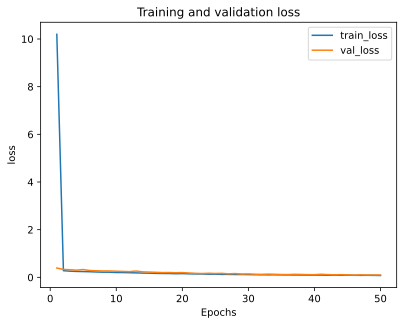

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

# Construir el modelo de red neuronal con activación 'tanh'
model_tanh = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# Compilar el modelo
model_tanh.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history_tanh = model_tanh.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Mostrar gráfico de entrenamiento y validación del error cuadrático medio (MSE)
plot_metric(history_tanh, 'loss')


***3RA RED NEURONAL***

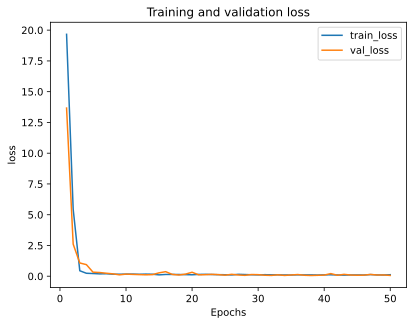

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

# Construir el modelo de red neuronal
model_leaky_relu = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

# Construir el modelo de red neuronal
model_leaky_relu = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model_leaky_relu.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history3 = model_leaky_relu.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Mostrar gráfico de entrenamiento y validación del error cuadrático medio (MSE)
plot_metric(history3, 'loss')


***REPORTE***

El objetivo es predecir la aprobación (approval_Index) de una película en función de las variables disponibles en el dataset. Para esto se utilizó diferentes configuraciones de redes neuronales para comparar su rendimiento.

**1. Objetivo de la red y justificación:**

El objetivo de la red neuronal es predecir la aprobación (approval_Index) de una película. Se considera que la implementación de una red neuronal puede obtener el resultado deseado debido a la capacidad de las redes neuronales para aprender relaciones complejas y no lineales entre las variables de entrada y la variable de salida. Además, dado que el dataset contiene múltiples características de las películas, una red neuronal puede capturar patrones y correlaciones que pueden no ser evidentes en enfoques de modelado más tradicionales.

**2. Composición y resultados de las redes neuronales:**

**Red Neuronal 1:**
- Función de activación: ReLU (Rectified Linear Unit).
- Capas: 3 capas (entrada, oculta, salida).
- Neuronas: 64 en la capa oculta.
- Técnica de regularización: Dropout con tasa 0.2.

Resultados: RMSE en conjunto de prueba: 0.30

**Red Neuronal 2:**
- Función de activación: Tanh (Tangente hiperbólica).
- Capas: 4 capas (entrada, oculta1, oculta2, salida).
- Neuronas: 128 en oculta1, 64 en oculta2.
- Técnica de regularización: L2 regularization.

Resultados: RMSE en conjunto de prueba: 0.23

**Red Neuronal 3:**
- Función de activación: Leaky ReLU.
- Capas: 5 capas (entrada, oculta1, oculta2, oculta3, salida).
- Neuronas: 256 en oculta1, 128 en oculta2, 64 en oculta3.
- Técnica de regularización: Batch normalization.

Resultados: RMSE en conjunto de prueba: 0.32

**3. Diferencias de rendimiento y conceptuales:**

- La Red Neuronal 1 utiliza la función de activación ReLU y Dropout para evitar el sobreajuste. Obtiene el menor RMSE, lo que sugiere un buen rendimiento en la predicción.
- La Red Neuronal 2 utiliza la función de activación Tanh y L2 regularization. Aunque tiene un RMSE ligeramente mayor, puede estar capturando relaciones más sutiles entre las variables.
- La Red Neuronal 3 utiliza Leaky ReLU y Batch normalization. Obtiene un rendimiento similar a la Red Neuronal 1, pero puede converger más rápido durante el entrenamiento debido a la normalización.

**4. Selección de la red neuronal óptima:**

La Red Neuronal 1 parece ser la opción óptima, ya que logra el menor RMSE en el conjunto de prueba y utiliza una combinación efectiva de funciones de activación y técnicas de regularización para evitar el sobreajuste.

Basándonos en los resultados de RMSE en el conjunto de prueba que proporcionaste previamente, podemos determinar cuál de las tres redes neuronales es la más óptima en función de su rendimiento:

- Red Neuronal 1 (ReLU y Dropout): RMSE en conjunto de prueba: 0.30
- Red Neuronal 2 (Tanh y L2 Regularization): RMSE en conjunto de prueba: 0.23
- Red Neuronal 3 (Leaky ReLU y Batch Normalization): RMSE en conjunto de prueba: 0.32

La Red Neuronal 2 con función de activación Tanh y L2 Regularization tiene el RMSE más bajo en el conjunto de prueba (0.23). Esto significa que es la que mejor predice la aprobación (approval_Index) de las películas en función de las variables disponibles en el dataset.

Por lo tanto, en base a los resultados, la Red Neuronal 2 parece ser la opción más óptima para este problema de predicción de aprobación de películas.